# M2 ISDS Online Convex Opitmization

# Homework

Contact: Pierre Gaillard, pierre.gaillard@inria.fr
         Joseph de Vilmarest, joseph.de-vilmarest@vikingconseil.fr


## Part I. Rock Paper Scissors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of actions
M=3
names = ["Rock", "Paper", "Scissors"]
# Solutions only for M=3, the Lizard and Spock got lost somewhere in Chartreuse, and the Well is haunted.
p_init = np.array([1/M for i in range(M)])

---
## Setting
We consider the sequential version of the following repeated two-players, zero-sum game.

Let $M\in\mathbb{N}$ be a number of actions, $L\in[-1, 1]^{M\times M}$ be a loss matrix, and $T\in\mathbb{N}^*$ be a time horizon. \\
At each round $t=1, \dots, T$:
- The player chooses a distribution $p_t\in \Delta_M:=\{p\in[0, 1]^M,\ \sum_{i=1}^M p_i=1\}$.
- The adversary chooses a distribution $q_t\in\Delta_M$.
- Actions $i_t \sim p_t$ and $j_t\sim q_t$ are sampled for the player and the adversary.
- The player incurr the loss $l_t=L(i_t, j_t)$ and the adversary $-L(i_t, j_t)$.

BEWARE: The adversary choses its vector after the player, and can chose its distribution using the one of the player!

#### Question 1.
Let's assume that a win yields a loss $-1$, and a tie, $0$. What is the loss matrix $L$ of "Rock, Paper, Scissors"?


(If you are bored, change the first cell of this document and add the Lizard, Spock and/or the Well, but I have not done it myself. You can also change the matrix so that losing/wining with a particular action is more costly than others)

In [ ]:
# Replace L with the right expression.
L = None # an np array of shape (M, M)

---
We assume that both the player and the adversary know $L$ in advance.

#### Question 2.a.
Given a distribution $p\in\Delta_M$, implement the function returning an action (in $0, \dots, M-1$ because python is $0$-indexed).

In [ ]:
def sample_action(p):
  # p: an np.array of shape (M,); vector of weights in Delta_M
  # Returns: An integer in 0, ..., M-1; sampled according to p

  # Hint: you only need to sample a uniform distribution in [0, 1], use np.random.rand() only once.

  # ---
  # ADD YOUR CODE HERE
  # ---
  return

### Exponential Weighted Average
We assume that the player uses an Exponential Weighted Average (EWA) strategy with learning rate $\eta>0$.

We denote $p_t\in\Delta_M$ the distribution chosen by the player at round $t\in1, \dots, T$ and $l_t\in[-1, 1]^M$ the loss vector of this round. For round $t+1$, the new distribution defined by this strategy is defined, for all $i\in 1, \dots, M$ as:
$$p_{t+1}(i) = \frac{p_t(i)\exp\big(-\eta l_t(i)\big)}{\sum_{j=1}^Mp_t(j)\exp\big(-\eta l_t(j)\big)}$$

#### Question 2.b
Define the function EWA_update that takese as input a learning rate $\eta$, a vector $p_t$ and a loss vector $l_t$ and return $p_{t+1}$.

In [ ]:
def EWA_update(eta, p, l):
  # eta: learning rate
  # p: an np.array of shape (M,); vector of weights in Delta_M; to be updated
  # l: an np.array of shape (M,); vector of losses in [-1, 1]^M incurred by the player
  # Returns: an np.array of shape (M,); p updated with the loss l

  # ---
  # ADD YOUR CODE HERE
  # ---
  return

### Part 1.1. Beating a fixed adversary
We assume that the adversary uses a fixed distribution vector : $q_{fixed}=(1/3, 1/6, 1/2)$, unknown to us. Let's see how EWA fares.

BEWARE: There can be several types of adversary. We first look at a "fixed" adversary who does not change. But in the worst case, the adversary can be aware of the strategy of the player. An in-between is a "player-like" adversary who adapt its strategy taking into consideration its own past actions and losses. To account for all these possibilities, the adversary decision is implemented as a function taking in argument:
- a learning rate
- the vector player by the adversary in the round before,
- the loss incurred by him the round before,
- the current decision of the player.

If the adversary needs to make an update using an incurred loss at round t (just like EWA), he does it in the round t+1 after the player chose its vector.


In [ ]:
q_fixed = np.array([1/3, 1/6, 1/2])

def fixed_adversary_update(eta_adv, q, l, p):
  # eta_adv: learning rate for the adversary
  # q: an np.array of shape (M,); vector of weights in Delta_M used in round t-1 by the adversary
  # l: an np.array of shape (M,t); vector of losses in [-1, 1]^M incurred by the adversary
  # p: an np.array of shape (M,); vector of weights in Delta_M used in round t by the player
  # Returns: q_fixed

  return q_fixed

#### Question 3.a.
Simulate an instance of the game for $T=100$ rounds and a learning rate $\eta=1$. Plot the evolution of the weight vector. What seems to be the best strategy?

In [ ]:
def single_run(T, update_fct, eta, adversary_update, eta_adv):
  # T: horizon
  # update_fct: function (eta, p, l) -> p, updating p with the loss for the player
  # eta: learning rate for the player
  # adversary_update: function (eta_adv, q, l, p) -> q, updating q with the a loss for the adversary
  # eta_adv: learning rate for the adversary
  # Returns: {"weigths_player": np.array((T, M)), "loss_player_logs": np.array((T,)), "weigths_adv": np.array((T, M))}

  p = p_init
  q = p_init
  weights_player = np.zeros((T, M))
  loss_player_logs = np.zeros((T,))
  weights_adv = np.zeros((T, M))
  loss_player = None # array(M,)
  loss_adversary = None # array(M,)
  for t in range(T):
    # ---
    # ADD YOUR CODE HERE
    # See the setting
    # ---
    pass
  return{"weights_player": weights_player,
         "loss_player_logs": loss_player_logs,
         "weights_adv": weights_adv}

In [ ]:
T=100
eta = 1
eta_adv = 1

results = single_run(T, EWA_update, eta, fixed_adversary_update, eta_adv)

#### Question 3.b..
Plot the weights $p_t$ over time of EWA agains the fixed adversary.

Text(0.5, 1.0, 'Action weights over time against a fixed adversary')

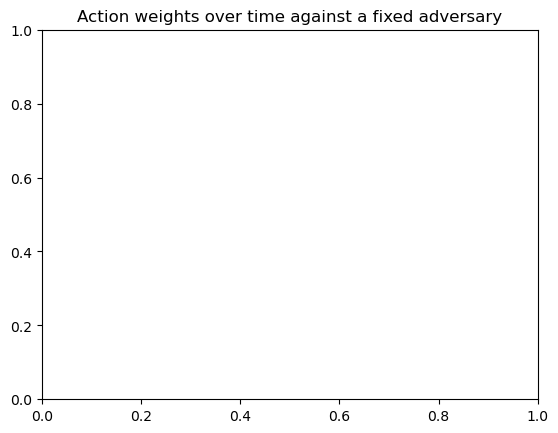

In [ ]:
plt.title("Action weights over time against a fixed adversary")
# ---
# ADD YOUR CODE HERE
# ---

#### Question 3.c.
Repeat the experiment $n_{exp}=200$ times, for an horizon of $T=100$ rounds. Plot the average loss $\bar{l}_t = \frac{1}{t}\sum_{s=1}^tL(i_s, j_s)$ with respect to time (averaged over the experiments). Comment.

In [ ]:
def runs_experiment(T, update_fct, eta, adversary_update, eta_adv, n_exp):
  # T: horizon
  # update_fct: function (eta, p, l) -> p, updating p with the loss
  # eta: learning rate
  # adversary_update: function (eta_adv, q, l, p) -> q, updating q with the loss for the adversary
  # eta_adv: learning rate for the adversary
  # n_exp: number of runs
  # Returns: {"weigths_player": np.array((n_exp, T, M)), "loss_player_logs": np.array((n_exp, T)), "weigths_adv": np.array((n_exp, T, M))}

  weights_player = np.zeros((n_exp, T, M))
  loss_player_logs = np.zeros((n_exp, T))
  weights_adv = np.zeros((n_exp, T, M))
  for n in range(n_exp):
    # ---
    # ADD YOUR CODE HERE
    # Run single experiments and log the results
    # ---
    pass
  return{"weights_player": weights_player,
         "loss_player_logs": loss_player_logs,
         "weights_adv": weights_adv}

In [ ]:
T=100
eta = 1
eta_adv = 1
n_exp = 200

results = runs_experiment(T, EWA_update, eta, fixed_adversary_update, eta_adv, n_exp)

Text(0.5, 1.0, 'Average loss against a fixed adversary')

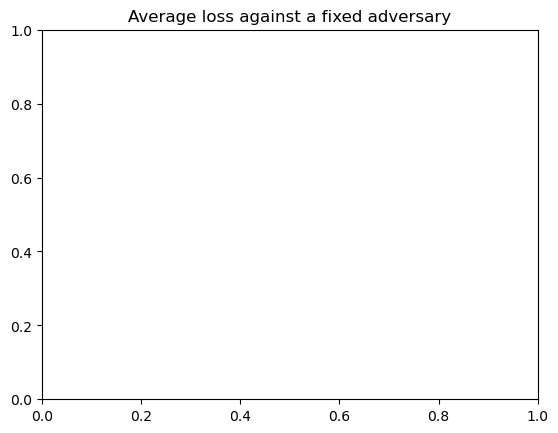

In [ ]:
plt.title("Average loss against a fixed adversary")
# ---
# ADD YOUR CODE HERE
# ---

#### Question 3.d.
Repeat the simulations for different learning rates $\eta\in\{0.01, 0.05, 0.5, 1\}$. What are the best learning rate in practice and in theory?

In [ ]:
T=100
eta_theory = None # Add the theoretical value here
eta_theory

In [ ]:
def eta_experiments(T, update_fct, eta_list, adversary_update, eta_adv, n_exp):
  # T: horizon
  # update_fct: function (eta, p, l) -> p, updating p with the loss
  # eta_list: list of learning rates to test
  # adversary_update: function (eta_adv, q, p, l) -> q, updating q with the a loss for the adversary
  # eta_adv: learning rate for the adversary
  # n_exp: number of runs
  # Returns: {"weigths_player": np.array((len(eta_list), n_exp, T, M)), "incurred_loss": np.array((len(eta_list), n_exp, T))}

  weights_player = np.zeros((len(eta_list), n_exp, T, M))
  loss_player_logs = np.zeros((len(eta_list), n_exp, T))
  for e in range(len(eta_list)):
    eta = eta_list[e]
    # ---
    # ADD YOUR CODE HERE
    # ---

  return{"weights_player": weights_player,
         "loss_player_logs": loss_player_logs}

In [ ]:
T=100
eta_list = [0.01, 0.03, 0.1, 0.3, 1]
eta_adv = 1
n_exp = 200

results = eta_experiments(T, EWA_update, eta_list, fixed_adversary_update, eta_adv, n_exp)

Text(0.5, 1.0, 'Average loss with constant adversary')

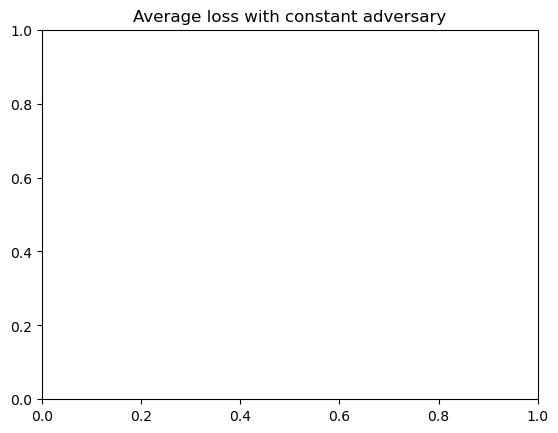

In [ ]:
plt.title("Average loss with constant adversary")
# ---
# ADD YOUR CODE HERE
# ---

### Part 1.3. Online Gradient Descent
Now let's implement Online Gradient Descent (OGD), to eventually have it play against EWA.

For a learning rate $\eta>0$, we remind that the update of OGD proceeds as:
$$p_{t+1} = \Pi_{\Delta_M}\big(p_t-\eta\nabla l_t(p_t)\big)$$
where:
- $\Pi_{\Delta_M}$ denotes the projection on the unit simplex in dimension $M$,
- $l_t:x\in\Delta_M\mapsto \sum_{i=1}^M x(i)L(i,j_t)\in[-1, 1]$ where $j_t$ is the choice of the adversary.

#### Projection on the unit simplex

Here is a simple algorithm to implement (Source at the end of the document).

Let $x=\big(x(i)\big)\in\mathbb{R}^M$,
- Sort the coordinates of x into $y_1\geq y_2\geq\dots\geq y_M$,
- Find
$$ \rho=\max\Big\{j\in 1,\dots,M:\ y_j-\frac{1}{j}\big(\sum_{r=1}^jy_r-1\big)>0\Big\},$$
- Define $z = \frac{1}{\rho}\big(\sum_{r=1}^jy_r-1\big)$,
- Return, for all $i=1, \dots,M$
$$\big(\Pi_{\Delta_M}(x)\big)(i) = \max\big\{x(i)-z, 0\big\}$$

#### Question 4.a. Define the projection function

In [ ]:
# Projection on the simplex.
def proj_simplex(p):
  # p: vector in R^M
  # Returns: a vector in Delta_M

  # ---
  # ADD YOUR CODE HERE
  # ---
  return

#### OGD Implementation
We can now implement OGD.

#### Question 4.b.
Implement OGD update.

In [ ]:
def OGD_update(eta, p, l, q=None):
  # eta: learning rate
  # p: an np.array of shape (M,); vector of weights in Delta_M; to be updated
  # l: an np.array of shape (M,); vector of losses in [-1, 1]^M
  # q: weights used by the player, (when OGD is used as the adversary)
  # Returns: an np.array of shape (M,); p updated with the loss l

  if l is None:
    # Case for the first round when OGD is used as an adversary
    # ---
    # ADD YOUR CODE HERE
    # ---
    pass
  else:
    # ---
    # ADD YOUR CODE HERE
    # ---
    pass
  return

### EWA VS OGD

Run experiments with EWA facing OGD.

In [ ]:
T=100
eta_EWA = 0.1
eta_OGD = 0.1
n_exp = 200

results = runs_experiment(T, EWA_update, eta_EWA, OGD_update, eta_OGD, n_exp)


#### Question 5.
We define $\bar{p}_t = \frac{1}{t}\sum_{s=1}^t p_s$. Plot the Euclidian distance of this vector to the point $(1/3, 1/3, 1/3)$ for both strategies. What do you observe?

In [ ]:
# ---
# ADD YOUR CODE HERE
# ---

## Part II. MNIST

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from pathlib import Path

In [ ]:
folder_path = "data_letters/"
file_regex = folder_path + "*/*.png"
L_files = glob.glob(file_regex, recursive=True)

In [ ]:
def get_label(path: str):
    letter = path[0]
    if letter == "A":
        return 1
    elif letter == "B" or letter == "C":
        return -1
    else:
        raise Exception("Letter not recognized")

In [ ]:
X_raw = []
Y_raw = []
for file_path in L_files:
    img = np.array(plt.imread(file_path))
    img_label = get_label(Path(file_path).name)
    X_raw.append(img)
    Y_raw.append(img_label)

In [ ]:
# transforming images to vectors
X_raw = [X_raw[i].reshape(28*28) for i in range(len(X_raw))]

In [ ]:
np.random.seed(0)
perm = np.random.permutation(len(X_raw))
X = [X_raw[perm[i]] for i in range(len(X_raw))]
Y = [Y_raw[perm[i]] for i in range(len(Y_raw))]

In [ ]:
def loss_01(y, x, theta):
    # 0-1 loss
    # ADD YOUR CODE HERE
def loss_logistic(y, x, theta):
    # logistic loss
    # ADD YOUR CODE HERE

In [ ]:
def gradient_logistic(y, x, theta):
    # ADD YOUR CODE HERE
def hessian_logistic(y, x, theta):
    # ADD YOUR CODE HERE

# References
- Sequential Learning Homework, Master MVA, 2021-2022, P. Gaillard & R. Degenne
- Duchi, J., Shalev-Shwartz, S., Singer, Y., & Chandra, T. (2008, July). Efficient projections onto the l 1-ball for learning in high dimensions. In Proceedings of the 25th international conference on Machine learning (pp. 272-279).